In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


dist_start = 0
PIX_PER_MIN = 10
BLOCKSIZE = 5

In [2]:
block = lambda x, y, size=3: (slice(y, y+size), slice(x, x+size))


def contrast(front_pixs, back_pixs):
    front = np.mean(np.array(front_pixs))
    back  = np.mean(np.array(back_pixs))
    k = abs(front - back) / max(front, back)
    return k

In [3]:
def l_pix_vis(img, threshold):
    l_side = [img[block(139, y, size=BLOCKSIZE)] for y in range(0, img.shape[0], BLOCKSIZE)]
    l_side_sur_l = np.array([img[block(132, y, size=BLOCKSIZE)] for y in range(0, img.shape[0], BLOCKSIZE)], dtype=np.object)
    l_side_sur_r = np.array([img[block(148, y, size=BLOCKSIZE)] for y in range(0, img.shape[0], BLOCKSIZE)], dtype=np.object)
    l_side_sur = (l_side_sur_l + l_side_sur_r) / 2
    k = np.array([contrast(front, back) for front, back in zip(l_side, l_side_sur)])
    k = k[::-1]
    first_i = np.where(k < threshold)[0][0]
    # NOTE pixel coordinate is from top to button on y axis 
    pix_dist = img.shape[0] - first_i * BLOCKSIZE
    coor = (141, pix_dist)
    return coor

def r_pix_vis(img, threshold):
    r_side = [img[block(408, y, size=BLOCKSIZE)] for y in range(0, img.shape[0], BLOCKSIZE)]
    r_side_sur_l = np.array([img[block(400, y, size=BLOCKSIZE)] for y in range(0, img.shape[0], BLOCKSIZE)], dtype=np.object)
    k = np.array([contrast(front, back) for front, back in zip(r_side, r_side_sur_l)])
    k = k[::-1]
    first_i = np.where(k < threshold)[0][0]
    # NOTE pixel coordinate is from top to button on y axis 
    pix_dist = img.shape[0] - first_i * BLOCKSIZE
    coor = (410, pix_dist)
    return coor

Text(0.5, 1.0, 'frame 75 contrast ratio k')

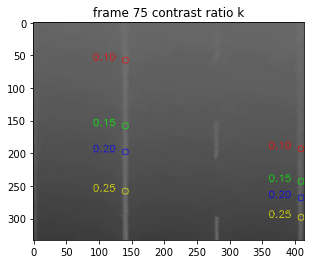

In [4]:
f = 75
file = '../fig/task3-trans/original_frame%s-trans.bmp' % f
img = cv2.imread(file)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
color = [[255, 0, 0], [0, 255, 0], [0,0,255], [255,251,0]]
for i, c in zip(np.arange(.1, .3, .05), color):
    l_coor = l_pix_vis(img, i)
    cv2.putText(img, '%.2f'%i, (l_coor[0]-50, l_coor[1]), cv2.FONT_HERSHEY_SIMPLEX, .5, c, 1)
    cv2.circle(img, l_coor, radius=5, color=c)
    r_coor = r_pix_vis(img, i)
    cv2.circle(img, r_coor, radius=5, color=c)
    cv2.putText(img, '%.2f'%i, (r_coor[0]-50, r_coor[1]), cv2.FONT_HERSHEY_SIMPLEX, .5, c, 1)
plt.imshow(img)
plt.title('frame %s contrast ratio k' % f)